In [26]:
#import necessary libraries 
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#read the data 
df = pd.read_excel('https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel', skiprows=3)



In [10]:
df.shape

(266, 66)

In [13]:
#extract GDP growth from 1990 to 2020 
df1 = df[df.columns[:65]]



In [14]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26044.435933,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1792.847428,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1856.687669,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4511.153227,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3540.891789,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1284.617635,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8737.079774,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1644.456831,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364


In [18]:
year1 = '1960'
year2 = '2020'

In [19]:
#extract the required data for the clustering
df_clust = df.loc[df.index, ['Country Name', year1, year2]]


In [22]:
df_clust

,Country Name,1960,2020
0,Aruba,NaN,24487.863560
1,Africa Eastern and Southern,162.907576,1353.769160
2,Afghanistan,62.369375,516.866552
3,Africa Western and Central,106.976475,1683.436391
4,Angola,NaN,1603.993477
...,...,...,...
261,Kosovo,NaN,4310.811183
262,"Yemen, Rep.",NaN,NaN
263,South Africa,529.561923,5741.643129
264,Zambia,228.567399,956.831364


In [27]:
#drop any row with missing values as its going to affect our clustering
df_clust = df_clust.dropna()

In [28]:
df_clust

,Country Name,1960,2020
1,Africa Eastern and Southern,162.907576,1353.769160
2,Afghanistan,62.369375,516.866552
3,Africa Western and Central,106.976475,1683.436391
13,Australia,1810.510249,51720.370763
14,Austria,935.460427,48809.226876
...,...,...,...
253,St. Vincent and the Grenadines,155.293588,8335.256476
259,World,459.260040,10881.703702
263,South Africa,529.561923,5741.643129
264,Zambia,228.567399,956.831364


Text(0.5, 1.0, '1960 GDP vs 2020 GDP')

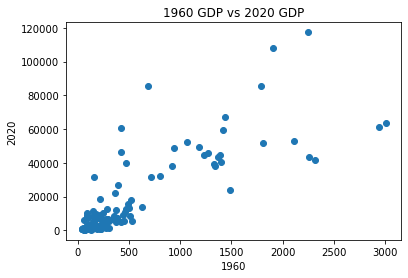

In [35]:
#create a scatter plot of the data

plt.scatter(df_clust['1960'], df_clust['2020'])
plt.xlabel('1960')
plt.ylabel('2020')
plt.title('1960 GDP vs 2020 GDP')

In [32]:
#find the optimal number of clusters using the elbow method
k_rng = range(1, 11)
sse = []
for i in k_rng:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clust[['1960', '2020']])
    sse.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
print(sse)

[69486291683.8262, 15566446185.626144, 5997169607.497236, 3897989375.9984426, 2479179390.0617943, 1780222808.8407755, 1065312869.24392, 771171650.1131594, 494247660.36544436, 386381734.31249774]


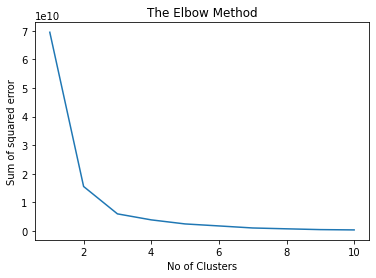

In [34]:
#plot the elbow graph
plt.plot(k_rng, sse)
plt.xlabel('No of Clusters')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method')
plt.savefig('clusters.png')
plt.show()
    

In [36]:
X = df_clust[["1960", "2020"]].copy()
print(X)

            1960          2020
1     162.907576   1353.769160
2      62.369375    516.866552
3     106.976475   1683.436391
13   1810.510249  51720.370763
14    935.460427  48809.226876
..           ...           ...
253   155.293588   8335.256476
259   459.260040  10881.703702
263   529.561923   5741.643129
264   228.567399    956.831364
265   276.643363   1372.696674

[132 rows x 2 columns]


In [37]:
#set the number of clusters
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [38]:
#fit the data and predict clusters
y_predicted = km.fit_predict(X)
print(y_predicted)

[0 0 0 1 1 0 1 0 0 0 0 0 2 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [39]:
#add the cluster column to the dataframe
X['cluster'] = y_predicted

In [40]:
X.head()

,1960,2020,cluster
1,162.907576,1353.769160,0
2,62.369375,516.866552,0
3,106.976475,1683.436391,0
13,1810.510249,51720.370763,1
14,935.460427,48809.226876,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


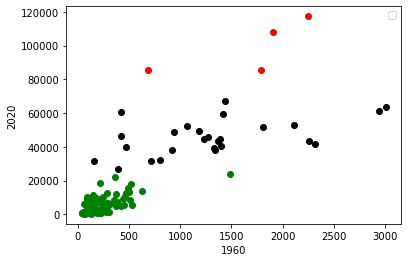

In [42]:
#create separate dataframes for each cluster
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]

#create a scatter plot for each cluster
plt.scatter(df1['1960'], df1['2020'], color='green')
plt.scatter(df2['1960'], df2['2020'], color='black')
plt.scatter(df3['1960'], df3['2020'], color='red')

plt.xlabel('1960')
plt.ylabel('2020')
plt.legend()

In [43]:
#list of columns to be scaled
cols_to_scale = ['1960', '2020']

#create scaler instance
scaler = MinMaxScaler()

#scale the columns in the dataset
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

#assign scaled data to new_X
new_X = X[cols_to_scale]